# SET B node 2

In [1]:
import pandas as pd 
import numpy as np
import test_cleaner
import ppscore as pps
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import mean_squared_error
import re
%matplotlib inline
import test_cleaner
import matplotlib.pyplot as plt

In [2]:
data_setA_node1 = pd.read_csv('data_setB_node2.csv')
data_setA_node1['date'] = pd.to_datetime(data_setA_node1['date'])
data_setA_node1 = data_setA_node1.set_index('date')

In [3]:
data_setA_node1.head()

,Unnamed: 0,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,...,misleading,disproportionate,york,shake,wallet,intrusive,diversity,prompt,attentive,pigeon
date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,0,45403,45521,10472,1,14554,112.758286,429.700012,85.650002,541.700012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-09,1,47202,43295,9806,1,13725,110.458405,434.390015,85.879997,544.650024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-10,2,46622,42652,7816,0,12394,113.411430,443.510010,87.949997,556.109985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,3,47063,44437,7857,2,12479,115.600922,455.570007,90.099998,571.729980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,4,44508,45269,7314,0,11447,115.554909,465.570007,89.680000,584.179993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
non_text_features = [x for x  in list(data_setA_node1.columns[0:65]) if 't-' in x]
print(len(non_text_features))

44


In [5]:
text_features = [x for x  in list(data_setA_node1.columns[66:])]
print(text_features[0])
print(text_features[1])
print(text_features[-1])
print(len(text_features))

landlord
adore
pigeon
6392


## Text two day roll back 

* +1 == shift downward == look for values one day before 
* -1 == shift upward   == look for values one day in the future

In [6]:
data_setA_node1[text_features] = data_setA_node1[text_features].shift(1)
mapping = dict(zip(text_features,[x + '_t-1' for x in text_features]))
data_setA_node1 = data_setA_node1.rename(columns = mapping)
text_features = [x + '_t-1' for x in text_features]
data_setA_node1[text_features].head()

,landlord_t-1,adore_t-1,annual_t-1,query_t-1,light_t-1,dismantle_t-1,hurtful_t-1,teammate_t-1,attain_t-1,anonymously_t-1,...,misleading_t-1,disproportionate_t-1,york_t-1,shake_t-1,wallet_t-1,intrusive_t-1,diversity_t-1,prompt_t-1,attentive_t-1,pigeon_t-1
date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
temp = data_setA_node1[text_features].shift(1)
temp.columns = [x[0:-1] + str(int(x[-1]) +1)  for x in text_features]

In [8]:
temp.head()

,landlord_t-2,adore_t-2,annual_t-2,query_t-2,light_t-2,dismantle_t-2,hurtful_t-2,teammate_t-2,attain_t-2,anonymously_t-2,...,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2,intrusive_t-2,diversity_t-2,prompt_t-2,attentive_t-2,pigeon_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = data_setA_node1.merge(temp, left_index = True, right_index =True, how = 'inner')
data = data.dropna()
data.head()

,Unnamed: 0,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,...,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2,intrusive_t-2,diversity_t-2,prompt_t-2,attentive_t-2,pigeon_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,2,46622,42652,7816,0,12394,113.411430,443.510010,87.949997,556.109985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,3,47063,44437,7857,2,12479,115.600922,455.570007,90.099998,571.729980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,4,44508,45269,7314,0,11447,115.554909,465.570007,89.680000,584.179993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,5,44555,44688,7583,3,10436,116.668060,461.190002,89.760002,583.960022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,6,45184,44310,7442,0,10174,118.222786,475.480011,90.849998,601.780029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Standardisation 

## Log transformation 
### We have to take out amazon as there are potential dat aissus

In [10]:
amazon = [x for x in (data.columns) if 'Amazon (company).wiki' in x]
print(amazon)
data = data.drop(columns = amazon)
data.head()

['Amazon (company).wiki', 'Amazon (company).wiki_t-1', 'Amazon (company).wiki_t-2', 'Amazon (company).wiki_t-3', 'Amazon (company).wiki_t-1_t-2', 'Amazon (company).wiki_t-2_t-3', 'Amazon (company).wiki_t-3_t-4']


,Unnamed: 0,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,...,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2,intrusive_t-2,diversity_t-2,prompt_t-2,attentive_t-2,pigeon_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,2,46622,42652,7816,12394,113.411430,443.510010,87.949997,556.109985,40.275764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,3,47063,44437,7857,12479,115.600922,455.570007,90.099998,571.729980,41.115414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,4,44508,45269,7314,11447,115.554909,465.570007,89.680000,584.179993,41.187630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,5,44555,44688,7583,10436,116.668060,461.190002,89.760002,583.960022,41.314034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,6,45184,44310,7442,10174,118.222786,475.480011,90.849998,601.780029,42.126591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
non_text_features = [x for x in non_text_features if  x not in amazon]
print(len(non_text_features))

38


In [12]:
non_text_features[:12]

['Facebook.wiki_t-1',
 'Facebook.wiki_t-2',
 'Facebook.wiki_t-3',
 'Google.wiki_t-1',
 'Google.wiki_t-2',
 'Google.wiki_t-3',
 'Microsoft.wiki_t-1',
 'Microsoft.wiki_t-2',
 'Microsoft.wiki_t-3',
 'Apple Inc..wiki_t-1',
 'Apple Inc..wiki_t-2',
 'Apple Inc..wiki_t-3']

## log trans for wiki t- n 

Facebook.wiki_t-1
Facebook.wiki_t-2
Facebook.wiki_t-3
Google.wiki_t-1
Google.wiki_t-2
Google.wiki_t-3
Microsoft.wiki_t-1
Microsoft.wiki_t-2
Microsoft.wiki_t-3
Apple Inc..wiki_t-1
Apple Inc..wiki_t-2
Apple Inc..wiki_t-3


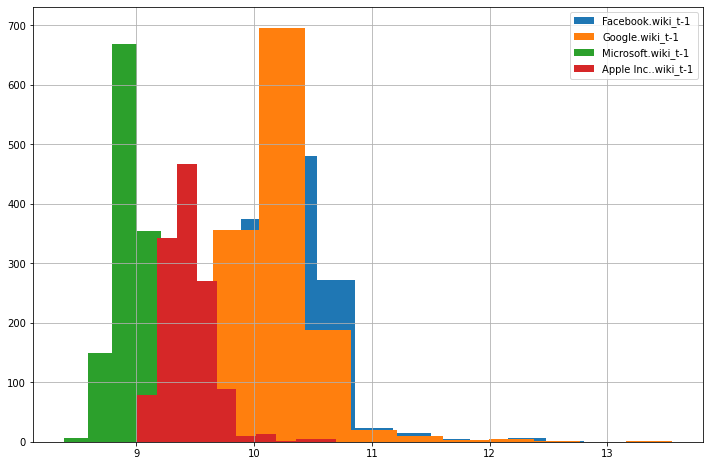

In [13]:
plt.figure(figsize= (12,8))
for features in non_text_features[:12]: 
    if 'wiki' in features: 
        if 't-1_t-2' not in features: 
            if 't-2_t-3' not in features: 
                 if 't-3_t-4' not in features: 
                    print(features) 
                    data[features] = np.log(data[features])
                    if features[-1] == '1':
                        data[features].hist(legend = True)

In [14]:
non_text_features[12:]

['FB_return_t-1',
 'FB_return_t-2',
 'FB_return_t-3',
 'GOOGL_return_t-1',
 'GOOGL_return_t-2',
 'GOOGL_return_t-3',
 'MSFT_return_t-1',
 'MSFT_return_t-2',
 'MSFT_return_t-3',
 'AMZN_return_t-1',
 'AMZN_return_t-2',
 'AMZN_return_t-3',
 'AAPL_return_t-1',
 'AAPL_return_t-2',
 'AAPL_return_t-3',
 'Facebook.wiki_t-1_t-2',
 'Facebook.wiki_t-2_t-3',
 'Facebook.wiki_t-3_t-4',
 'Google.wiki_t-1_t-2',
 'Google.wiki_t-2_t-3',
 'Google.wiki_t-3_t-4',
 'Microsoft.wiki_t-1_t-2',
 'Microsoft.wiki_t-2_t-3',
 'Microsoft.wiki_t-3_t-4',
 'Apple Inc..wiki_t-1_t-2',
 'Apple Inc..wiki_t-2_t-3']

In [15]:
data['Facebook.wiki_t-1_t-2'] = data['Facebook.wiki_t-1'] - data['Facebook.wiki_t-2']
data['Facebook.wiki_t-2_t-3'] = data['Facebook.wiki_t-2'] - data['Facebook.wiki_t-3']

In [16]:
data['Google.wiki_t-1_t-2'] = data['Google.wiki_t-1'] - data['Google.wiki_t-2']
data['Google.wiki_t-2_t-3'] = data['Google.wiki_t-2'] - data['Google.wiki_t-3']

In [17]:
data['Microsoft.wiki_t-1_t-2'] = data['Microsoft.wiki_t-1'] - data['Microsoft.wiki_t-2']
data['Microsoft.wiki_t-2_t-3'] = data['Microsoft.wiki_t-2'] - data['Microsoft.wiki_t-3'] 

In [18]:
data['Apple Inc..wiki_t-1_t-2'] = data['Apple Inc..wiki_t-1'] - data['Apple Inc..wiki_t-2']
data['Apple Inc..wiki_t-2_t-3'] = data['Apple Inc..wiki_t-2'] - data['Apple Inc..wiki_t-3']

In [19]:
data = data.drop(columns = ['Facebook.wiki_t-3_t-4',
                            'Microsoft.wiki_t-3_t-4',
                            #'Apple Inc..wiki_t-3_t-4',
                            'Google.wiki_t-3_t-4'])

In [20]:
data = data.drop(columns = 'Unnamed: 0')
data.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,FB_return,...,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2,intrusive_t-2,diversity_t-2,prompt_t-2,attentive_t-2,pigeon_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,46622,42652,7816,12394,113.411430,443.510010,87.949997,556.109985,40.275764,0.024103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,47063,44437,7857,12479,115.600922,455.570007,90.099998,571.729980,41.115414,0.024446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,44508,45269,7314,11447,115.554909,465.570007,89.680000,584.179993,41.187630,-0.004661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,44555,44688,7583,10436,116.668060,461.190002,89.760002,583.960022,41.314034,0.000892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,45184,44310,7442,10174,118.222786,475.480011,90.849998,601.780029,42.126591,0.012143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data.tail()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,FB_return,...,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2,intrusive_t-2,diversity_t-2,prompt_t-2,attentive_t-2,pigeon_t-2
date,,,,,,,,,,,,,,,,,,,,,
2020-08-03,17430,26244,11438,12808,434.965759,3111.889893,251.960007,1482.760010,216.017807,-0.006741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-04,16527,18095,9991,13311,437.870514,3138.830078,249.830002,1473.300049,212.775650,-0.008454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-05,16654,19028,8099,13297,439.457642,3205.030029,249.119995,1479.089966,212.426498,-0.002842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-06,14263,16961,7288,12109,454.790009,3225.000000,265.279999,1504.949951,215.828278,0.064868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-07,13744,15969,7916,12518,444.450012,3167.459961,268.440002,1498.369995,211.967606,0.011912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data.columns[0:55]

Index(['Facebook.wiki', 'Google.wiki', 'Microsoft.wiki', 'Apple Inc..wiki',
       'AAPL', 'AMZN', 'FB', 'GOOGL', 'MSFT', 'FB_return', 'FB_change',
       'GOOGL_return', 'GOOGL_change', 'MSFT_return', 'MSFT_change',
       'AMZN_return', 'AMZN_change', 'AAPL_return', 'AAPL_change',
       'Facebook.wiki_t-1', 'Facebook.wiki_t-2', 'Facebook.wiki_t-3',
       'Google.wiki_t-1', 'Google.wiki_t-2', 'Google.wiki_t-3',
       'Microsoft.wiki_t-1', 'Microsoft.wiki_t-2', 'Microsoft.wiki_t-3',
       'Apple Inc..wiki_t-1', 'Apple Inc..wiki_t-2', 'Apple Inc..wiki_t-3',
       'FB_return_t-1', 'FB_return_t-2', 'FB_return_t-3', 'GOOGL_return_t-1',
       'GOOGL_return_t-2', 'GOOGL_return_t-3', 'MSFT_return_t-1',
       'MSFT_return_t-2', 'MSFT_return_t-3', 'AMZN_return_t-1',
       'AMZN_return_t-2', 'AMZN_return_t-3', 'AAPL_return_t-1',
       'AAPL_return_t-2', 'AAPL_return_t-3', 'Facebook.wiki_t-1_t-2',
       'Facebook.wiki_t-2_t-3', 'Google.wiki_t-1_t-2', 'Google.wiki_t-2_t-3',
       'Micro

In [23]:
data.columns[55:]

Index(['landlord_t-1', 'adore_t-1', 'annual_t-1', 'query_t-1', 'light_t-1',
       'dismantle_t-1', 'hurtful_t-1', 'teammate_t-1', 'attain_t-1',
       'anonymously_t-1',
       ...
       'misleading_t-2', 'disproportionate_t-2', 'york_t-2', 'shake_t-2',
       'wallet_t-2', 'intrusive_t-2', 'diversity_t-2', 'prompt_t-2',
       'attentive_t-2', 'pigeon_t-2'],
      dtype='object', length=12784)

In [24]:
non_text_features = [x for x  in list(data.columns[0:55]) if 't-' in x]
non_text_features

['Facebook.wiki_t-1',
 'Facebook.wiki_t-2',
 'Facebook.wiki_t-3',
 'Google.wiki_t-1',
 'Google.wiki_t-2',
 'Google.wiki_t-3',
 'Microsoft.wiki_t-1',
 'Microsoft.wiki_t-2',
 'Microsoft.wiki_t-3',
 'Apple Inc..wiki_t-1',
 'Apple Inc..wiki_t-2',
 'Apple Inc..wiki_t-3',
 'FB_return_t-1',
 'FB_return_t-2',
 'FB_return_t-3',
 'GOOGL_return_t-1',
 'GOOGL_return_t-2',
 'GOOGL_return_t-3',
 'MSFT_return_t-1',
 'MSFT_return_t-2',
 'MSFT_return_t-3',
 'AMZN_return_t-1',
 'AMZN_return_t-2',
 'AMZN_return_t-3',
 'AAPL_return_t-1',
 'AAPL_return_t-2',
 'AAPL_return_t-3',
 'Facebook.wiki_t-1_t-2',
 'Facebook.wiki_t-2_t-3',
 'Google.wiki_t-1_t-2',
 'Google.wiki_t-2_t-3',
 'Microsoft.wiki_t-1_t-2',
 'Microsoft.wiki_t-2_t-3',
 'Apple Inc..wiki_t-1_t-2',
 'Apple Inc..wiki_t-2_t-3',
 'Apple Inc..wiki_t-3_t-4']

In [25]:
print(len(text_features))

6392


In [26]:
print(len(text_features + list(temp.columns)))

12784


In [27]:
text_f = text_features + list(temp.columns)
print(len(text_f))

12784


## Forecasting 

In [28]:
data = data.drop(columns = ['Apple Inc..wiki_t-3_t-4'])

In [29]:
train_test_split = 0.80
total_days = len(data.index)
split_week = data.index[round(total_days*(train_test_split))]
train = data[data.index <= split_week]
test = data[data.index > split_week]
print(split_week)
print(train.shape)
print(test.shape)

2019-08-05 00:00:00
(1025, 12838)
(255, 12838)


In [30]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
y_sc = StandardScaler()

In [52]:
non_text_features

['Facebook.wiki_t-1',
 'Facebook.wiki_t-2',
 'Facebook.wiki_t-3',
 'Google.wiki_t-1',
 'Google.wiki_t-2',
 'Google.wiki_t-3',
 'Microsoft.wiki_t-1',
 'Microsoft.wiki_t-2',
 'Microsoft.wiki_t-3',
 'Apple Inc..wiki_t-1',
 'Apple Inc..wiki_t-2',
 'Apple Inc..wiki_t-3',
 'FB_return_t-1',
 'FB_return_t-2',
 'FB_return_t-3',
 'GOOGL_return_t-1',
 'GOOGL_return_t-2',
 'GOOGL_return_t-3',
 'MSFT_return_t-1',
 'MSFT_return_t-2',
 'MSFT_return_t-3',
 'AMZN_return_t-1',
 'AMZN_return_t-2',
 'AMZN_return_t-3',
 'AAPL_return_t-1',
 'AAPL_return_t-2',
 'AAPL_return_t-3',
 'Facebook.wiki_t-1_t-2',
 'Facebook.wiki_t-2_t-3',
 'Google.wiki_t-1_t-2',
 'Google.wiki_t-2_t-3',
 'Microsoft.wiki_t-1_t-2',
 'Microsoft.wiki_t-2_t-3',
 'Apple Inc..wiki_t-1_t-2',
 'Apple Inc..wiki_t-2_t-3',
 'Apple Inc..wiki_t-3_t-4']

In [53]:
train_X, train_y = train[non_text_features[:-1] + text_f], train['FB_return']

In [54]:
test_X, test_y = test[non_text_features[:-1] + text_f], test['FB_return']

In [55]:
train_X_sc, train_y_sc = x_sc.fit_transform(train_X), y_sc.fit_transform(train_y.values.reshape(-1, 1))
test_X_sc, test_y_sc = x_sc.transform(test_X), y_sc.transform(test_y.values.reshape(-1, 1))

In [56]:
print(train_X_sc.shape, train_y_sc.shape)
print(test_X_sc.shape, test_y_sc.shape)

(1025, 12819) (1025, 1)
(255, 12819) (255, 1)


In [57]:
reg = lgb.LGBMRegressor(max_depth=10)
reg.fit(train_X,train_y)

LGBMRegressor(max_depth=10)

In [58]:
y_hat_train = y_sc.inverse_transform(reg.predict(train_X_sc)) 
def MDA(data, predicted_name): 
    correct = 0
    df = data[['FB',predicted_name]].reset_index()
    for i, r in df.iterrows(): 
        if  i  > 0: 
            if r[predicted_name] > df.at[i-1, 'FB']: 
                if r['FB'] > df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
            if r[predicted_name] < df.at[i-1, 'FB']: 
                if r['FB'] < df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
    return (correct/df.shape[0])

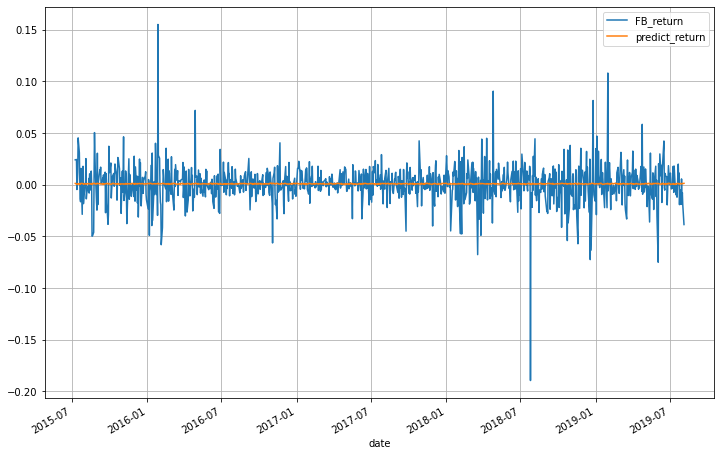

In [59]:
plt.figure(figsize = (12,8))
train['FB_return'].plot(legend = True)
train['predict_return'] = y_hat_train
train['predict_return'].plot(legend = True)
plt.grid()

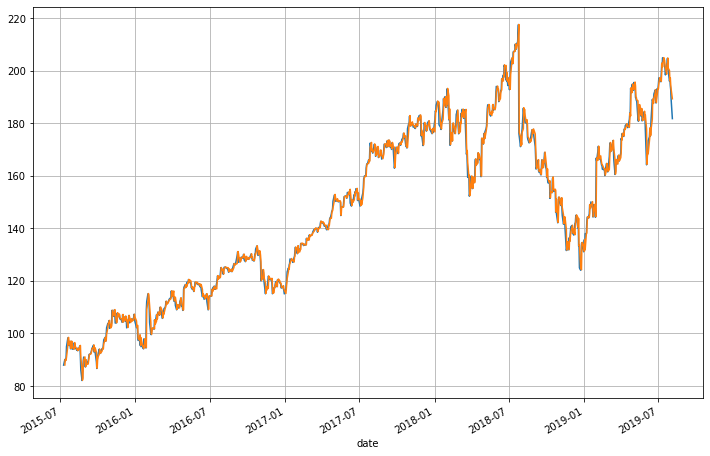

In [60]:
train['predicted_FB'] = train['FB'].shift(1) * (1 + train['predict_return']) 
plt.figure(figsize = (12,8))
train['FB'].plot()
train['predicted_FB'].plot()
plt.grid()

In [61]:
print(mean_absolute_error(train['FB'].iloc[1:], train['predicted_FB'].dropna()),'MAE')
print(mean_squared_error(train['FB'].iloc[1:], train['predicted_FB'].dropna()),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(train['FB'].iloc[1:]), abs(train['predicted_FB'].dropna()))),'MLSE')
print(MDA(train,'predicted_FB'),'MDA')

1.7650461914591238 MAE
8.039588236730632 RMSE
0.018514131685363443 MLSE
0.5307317073170732 MDA


In [62]:
y_hat_test = y_sc.inverse_transform(reg.predict(test_X_sc)) 
test['predict_return'] = y_hat_test 
#print(mean_absolute_error(train_y, y_hat_train))
#print(mean_squared_log_error(abs(train_y), abs(y_hat_train)))

In [63]:
stock_true = test['FB'].shift(1)
stock_true.iloc[0] = train['FB'].iloc[-1]

In [64]:
test['predicted_FB'] = stock_true * (1 + test['predict_return']) 
print(mean_absolute_error(test['FB'], test['predicted_FB']), 'MAE')
print(mean_squared_error(test['FB'], test['predicted_FB']),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(test['FB']), abs(test['predicted_FB']))),'MSLE')
print(MDA(test,'predicted_FB'),'MDA')

3.3913210336157107 MAE
24.799802003777366 RMSE
0.02604692182269758 MSLE
0.5725490196078431 MDA


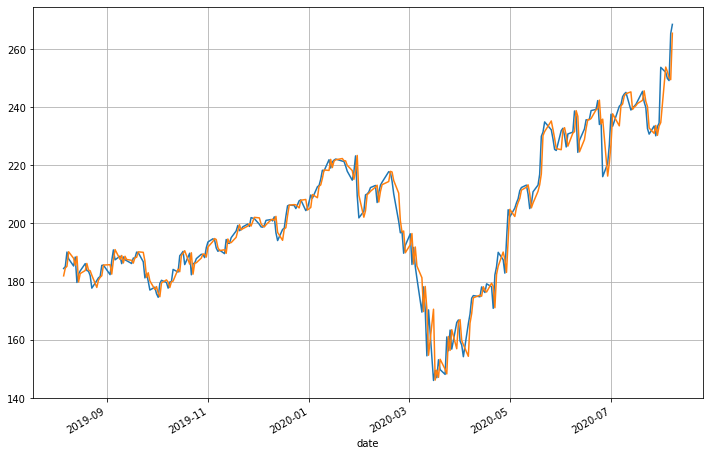

In [65]:
plt.figure(figsize = (12,8))
test['FB'].plot()
test['predicted_FB'].plot()
plt.grid()

In [66]:
non_zero_importance_name = train_X.columns[reg.feature_importances_ != 0]
non_zero_importance_value = reg.feature_importances_[reg.feature_importances_ != 0]
print(len(non_zero_importance_name))
print(len(non_zero_importance_value))

35
35


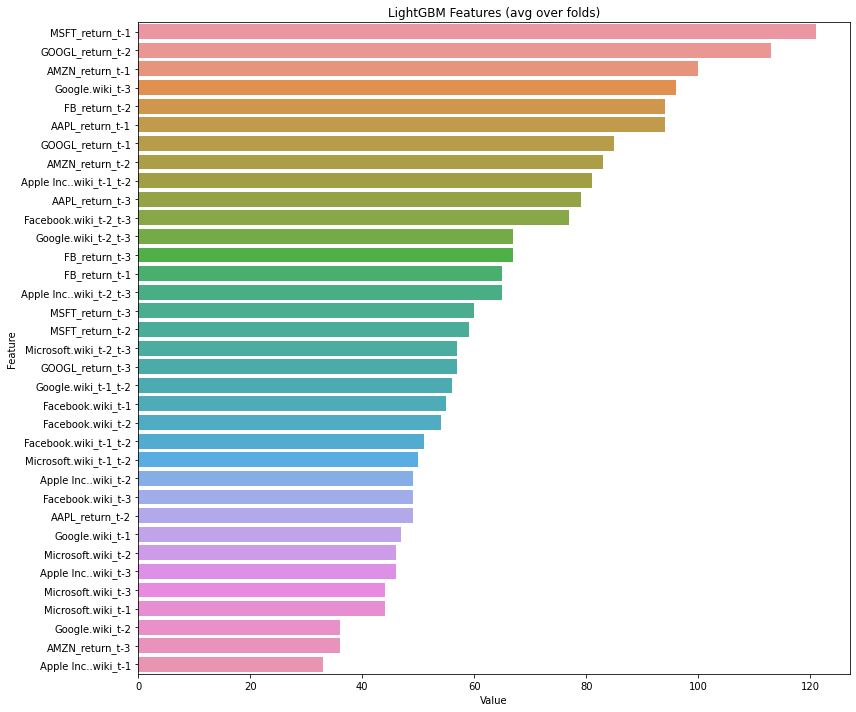

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(non_zero_importance_value , non_zero_importance_name)), columns=['Value','Feature'])

plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [63]:
#Model vlidation 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
reg_valid = LinearRegression()
reg_2 = SVR()

In [64]:
reg_2.fit(train_X_sc,train_y_sc)

SVR()

In [65]:
#reg_valid.coef_

In [66]:
y_hat_train = y_sc.inverse_transform(reg_2.predict(train_X_sc)) 
train['predict_return_linear'] = y_hat_train

<AxesSubplot:xlabel='date'>

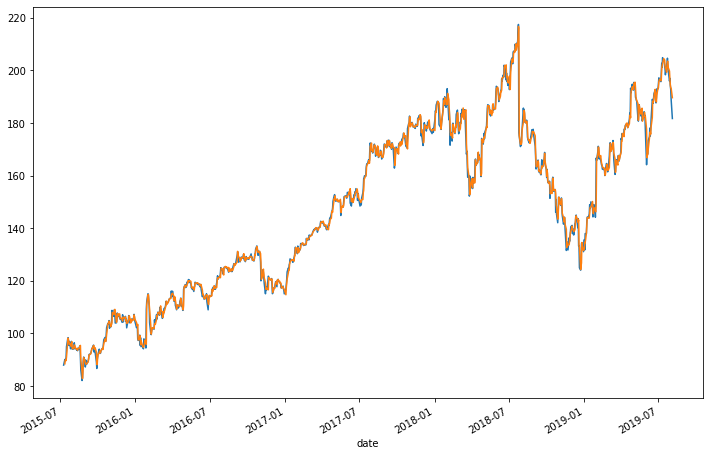

In [67]:
train['predicted_FB_linear'] = train['FB'].shift(1) * (1 + train['predict_return_linear']) 
plt.figure(figsize = (12,8))
train['FB'].plot()
train['predicted_FB_linear'].plot()

In [82]:
print(mean_absolute_error(train['FB'].iloc[1:], train['predicted_FB_linear'].dropna()),'MAE')
print(mean_squared_error(train['FB'].iloc[1:], train['predicted_FB_linear'].dropna()),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(train['FB'].iloc[1:]), abs(train['predicted_FB_linear'].dropna()))), 'RMLSE')
print(MDA(train,'predicted_FB_linear'),'MDA')

1.2515387465850731 MAE
5.878833278424697 RMSE
0.015473339207365329 RMLSE
0.8078048780487805 MDA


In [132]:
#train_X = train_X.drop(columns = ['Apple Inc..wiki_t-3_t-4_t-1','Apple Inc..wiki_t-3_t-4_t-1'])

In [83]:
y_hat_test = y_sc.inverse_transform(reg_2.predict(test_X_sc)) 
test['predict_return_linear'] = y_hat_test 

test['predicted_FB_linear'] = stock_true * (1 + test['predict_return_linear']) 
print(mean_absolute_error(test['FB'], test['predicted_FB_linear']), 'MAE')
print(mean_squared_error(test['FB'], test['predicted_FB_linear']),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(test['FB']), abs(test['predicted_FB_linear']))),'MSLE')
print(MDA(test,'predicted_FB_linear'),'MDA')

3.453871387094509 MAE
25.364254551161963 RMSE
0.02622797892728789 MSLE
0.5294117647058824 MDA


In [122]:
non_zero_importance_name = train_X.columns[reg.feature_importances_ != 0]
non_zero_importance_value = reg.feature_importances_[reg.feature_importances_ != 0]
print(len(non_zero_importance_name))
print(len(non_zero_importance_value))

36
36


In [124]:
non_zero_importance_name

Index(['Facebook.wiki_t-1', 'Facebook.wiki_t-2', 'Facebook.wiki_t-3',
       'Google.wiki_t-1', 'Google.wiki_t-2', 'Google.wiki_t-3',
       'Microsoft.wiki_t-1', 'Microsoft.wiki_t-2', 'Microsoft.wiki_t-3',
       'Apple Inc..wiki_t-1', 'Apple Inc..wiki_t-2', 'Apple Inc..wiki_t-3',
       'FB_return_t-1', 'FB_return_t-2', 'FB_return_t-3', 'GOOGL_return_t-1',
       'GOOGL_return_t-2', 'GOOGL_return_t-3', 'MSFT_return_t-1',
       'MSFT_return_t-2', 'MSFT_return_t-3', 'AMZN_return_t-1',
       'AMZN_return_t-2', 'AMZN_return_t-3', 'AAPL_return_t-1',
       'AAPL_return_t-2', 'AAPL_return_t-3', 'Facebook.wiki_t-1_t-2',
       'Facebook.wiki_t-2_t-3', 'Google.wiki_t-1_t-2', 'Google.wiki_t-2_t-3',
       'Microsoft.wiki_t-1_t-2', 'Microsoft.wiki_t-2_t-3',
       'Apple Inc..wiki_t-1_t-2', 'Apple Inc..wiki_t-2_t-3',
       'Apple Inc..wiki_t-3_t-4_t-2'],
      dtype='object')

In [114]:
train_X.columns

Index(['Facebook.wiki_t-1', 'Facebook.wiki_t-2', 'Facebook.wiki_t-3',
       'Google.wiki_t-1', 'Google.wiki_t-2', 'Google.wiki_t-3',
       'Microsoft.wiki_t-1', 'Microsoft.wiki_t-2', 'Microsoft.wiki_t-3',
       'Apple Inc..wiki_t-1',
       ...
       'misleading_t-2', 'disproportionate_t-2', 'york_t-2', 'shake_t-2',
       'wallet_t-2', 'intrusive_t-2', 'diversity_t-2', 'prompt_t-2',
       'attentive_t-2', 'pigeon_t-2'],
      dtype='object', length=12821)

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(non_zero_importance_value[:-1] , non_zero_importance_name[:-1])), columns=['Value','Feature'])
feature_imp.head()

,Value,Feature
0,7,Google.wiki_t-2
1,9,Apple Inc..wiki_t-1
2,10,Apple Inc..wiki_t-3
3,11,Facebook.wiki_t-2
4,12,AAPL_return_t-2


In [201]:
def wiki(x): 
    if 'wiki' in x: 
        return 'Wiki'

    else: 
        return 'Finance'

In [202]:
def Company(x): 
    if 'Google' in x or 'GOOGL' in x: 
        return 'Google'
    if 'Facebook' in x or 'FB' in x: 
        return 'Facebook'
    if 'Apple' in x or 'AAPL' in x: 
        return 'Apple'
    if 'AMZN' in x  : 
        return 'Amazon'
    if 'Microsoft' in x or 'MSFT' in x: 
        return 'Microsoft'

In [203]:
feature_imp['Data'] = feature_imp.apply(lambda x: wiki(x['Feature']),axis = 1)
feature_imp['Company'] = feature_imp.apply(lambda x: Company(x['Feature']),axis = 1)
feature_imp.head()

,Value,Feature,Data,Company
0,7,Google.wiki_t-2,Wiki,Google
1,9,Apple Inc..wiki_t-1,Wiki,Apple
2,10,Apple Inc..wiki_t-3,Wiki,Apple
3,11,Facebook.wiki_t-2,Wiki,Facebook
4,12,AAPL_return_t-2,Finance,Apple


In [69]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ball4308/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
import csv
import pandas as pd

# # stock market lexicon
stock_lex = pd.read_csv("/Users/ball4308/Desktop/MSc BA/BA Report /Jason's Project _ Basic Demo /StockSentimentTrading-master/lexicon_data/stock_lex.csv")
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
     if v > 0:
         stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
     else:
         stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

In [71]:
# # # Loughran and McDonald
positive = []
with open("/Users/ball4308/Desktop/MSc BA/BA Report /Jason's Project _ Basic Demo /StockSentimentTrading-master/lexicon_data/lm_positive.csv", 'r') as f:
     reader = csv.reader(f)
     for row in reader:
         positive.append(row[0].strip())
    
negative = []
with open("/Users/ball4308/Desktop/MSc BA/BA Report /Jason's Project _ Basic Demo /StockSentimentTrading-master/lexicon_data/lm_negative.csv", 'r') as f:
     reader = csv.reader(f)
     for row in reader:
         entry = row[0].strip().split(" ")
         if len(entry) > 1:
             negative.extend(entry)
         else:
             negative.append(entry[0])

final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sia.lexicon)
sia.lexicon = final_lex

In [72]:
LM = [x.lower() for x in sia.lexicon.keys()]
print(len(LM))
text_f_text = [x[:-4] for x in text_f]
print(len(text_f_text))
not_important_text  = [x for x in text_f_text if x not in LM]
print(len(not_important_text)) 

15453
12784
5708


In [73]:
delete1 = [x+'_t-1' for x in not_important_text]
delete2 = [x+'_t-2' for x in not_important_text]
data_lm = data.drop(columns = delete1).drop(columns = delete2)
data_lm.shape

(1280, 7130)

In [74]:
data_lm.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,FB_return,...,reparation_t-2,shutdown_t-2,unleash_t-2,edition_t-2,appear_t-2,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,46622,42652,7816,12394,113.411430,443.510010,87.949997,556.109985,40.275764,0.024103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-13,47063,44437,7857,12479,115.600922,455.570007,90.099998,571.729980,41.115414,0.024446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-14,44508,45269,7314,11447,115.554909,465.570007,89.680000,584.179993,41.187630,-0.004661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-15,44555,44688,7583,10436,116.668060,461.190002,89.760002,583.960022,41.314034,0.000892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16,45184,44310,7442,10174,118.222786,475.480011,90.849998,601.780029,42.126591,0.012143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
data_lm = data_lm[list(data_lm.columns[54:]) + ['FB_return'] + ['FB']]
data_lm.head()

,adore_t-1,annual_t-1,light_t-1,hurtful_t-1,attain_t-1,ridiculous_t-1,increase_t-1,cure_t-1,brown_t-1,threatening_t-1,...,unleash_t-2,edition_t-2,appear_t-2,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2,FB_return,FB
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024103,87.949997
2015-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024446,90.099998
2015-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004661,89.680000
2015-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000892,89.760002
2015-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012143,90.849998


In [76]:
train_test_split = 0.8
total_days = len(data_lm.index)
split_week = data_lm.index[round(total_days*(train_test_split))]
train = data_lm[data_lm.index <= split_week]
test = data_lm[data_lm.index > split_week]
print(split_week)
print(train.shape)
print(test.shape)

2019-08-05 00:00:00
(1025, 7078)
(255, 7078)


In [77]:
train.head()

,adore_t-1,annual_t-1,light_t-1,hurtful_t-1,attain_t-1,ridiculous_t-1,increase_t-1,cure_t-1,brown_t-1,threatening_t-1,...,unleash_t-2,edition_t-2,appear_t-2,misleading_t-2,disproportionate_t-2,york_t-2,shake_t-2,wallet_t-2,FB_return,FB
date,,,,,,,,,,,,,,,,,,,,,
2015-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024103,87.949997
2015-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024446,90.099998
2015-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.004661,89.680000
2015-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000892,89.760002
2015-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012143,90.849998


In [78]:
lis = data_lm.columns[:-2]
print((lis[-1]))

wallet_t-2


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
x_sc = StandardScaler()
y_sc = StandardScaler()

In [82]:
train_X, train_y = train[lis, train['FB_return']
test_X, test_y = test[lis, test['FB_return']
train_X_sc, train_y_sc = x_sc.fit_transform(train_X), y_sc.fit_transform(train_y.values.reshape(-1, 1))
test_X_sc, test_y_sc = x_sc.transform(test_X), y_sc.transform(test_y.values.reshape(-1, 1))

In [83]:
reg_4 = SVR(kernel = 'linear')

In [84]:
def MDA(data, predicted_name): 

    
    correct = 0
    df = data[['FB',predicted_name]].reset_index()
    for i, r in df.iterrows(): 
        if  i  > 0: 
            if r[predicted_name] > df.at[i-1, 'FB']: 
                if r['FB'] > df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
            if r[predicted_name] < df.at[i-1, 'FB']: 
                if r['FB'] < df.at[i-1, 'FB']: 
                    df.at[i,'correct'] = 1
                    correct += 1 
    return (correct/df.shape[0])

In [89]:
train['FB'].iloc[1:]

date
2015-07-13     90.099998
2015-07-14     89.680000
2015-07-15     89.760002
2015-07-16     90.849998
2015-07-17     94.970001
                 ...    
2019-07-30    197.039993
2019-07-31    194.229996
2019-08-01    192.729996
2019-08-02    189.020004
2019-08-05    181.729996
Name: FB, Length: 1024, dtype: float64

In [90]:
lis = data_lm.columns[:-2]

train_X, train_y = train[lis[:2]], train['FB_return']
test_X, test_y = test[lis[:2]], test['FB_return']
train_X_sc, train_y_sc = x_sc.fit_transform(train_X), y_sc.fit_transform(train_y.values.reshape(-1, 1))
test_X_sc, test_y_sc = x_sc.transform(test_X), y_sc.transform(test_y.values.reshape(-1, 1))

print(train_X_sc.shape, train_y_sc.shape)
print(test_X_sc.shape, test_y_sc.shape)

reg.fit(train_X_sc,train_y_sc)

y_hat_train = y_sc.inverse_transform(reg.predict(train_X_sc))

print('Train')
train['predict_return_linear'] = y_hat_train

stock_yesterday = [i for i in list(data['FB'].loc["2015-07-10":"2019-08-02"])]
print(len(stock_yesterday))

return_pred = [i for  i in list(train['predict_return_linear'].loc["2015-07-13":'2019-08-05'])]
print(len(return_pred))

pred_stock = [i1 * (1+i2) for (i1,i2) in zip(stock_yesterday,return_pred)]
print(len(pred_stock)) 

print(mean_absolute_error(train['FB'].iloc[1:].values, np.array(pred_stock)),'MAE')
print(mean_squared_error(train['FB'].iloc[1:], np.array(pred_stock)),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(train['FB'].iloc[1:]), abs(np.array(pred_stock)))),'MLSE')

(1025, 2) (1025, 1)
(255, 2) (255, 1)
Train
1024
1024
1024
1.7688022366554548 MAE
8.065692665440638 RMSE
0.01854098078567186 MLSE


In [91]:
reg.feature_importances_

array([0, 0], dtype=int32)

In [94]:
def train_test(reg,data_lm, LGBM): 

    lis = data_lm.columns[:-2]

    train_X, train_y = train[lis, train['FB_return']
    test_X, test_y = test[lis, test['FB_return']
    train_X_sc, train_y_sc = x_sc.fit_transform(train_X), y_sc.fit_transform(train_y.values.reshape(-1, 1))
    test_X_sc, test_y_sc = x_sc.transform(test_X), y_sc.transform(test_y.values.reshape(-1, 1))

    print(train_X_sc.shape, train_y_sc.shape)
    print(test_X_sc.shape, test_y_sc.shape)

    reg.fit(train_X_sc,train_y_sc)

    y_hat_train = y_sc.inverse_transform(reg.predict(train_X_sc))
    
    print('Train')
    train['predict_return_linear'] = y_hat_train

    stock_yesterday = [i for i in list(data['FB'].loc["2015-07-10":"2019-08-02"])]
    print(len(stock_yesterday))
    
    return_pred = [i for  i in list(train['predict_return_linear'].loc["2015-07-13":'2019-08-05'])]
    print(len(return_pred))

    pred_stock = [i1 * (1+i2) for (i1,i2) in zip(stock_yesterday,return_pred)]
    print(len(pred_stock)) 

    print(mean_absolute_error(train['FB'].iloc[1:].values, np.array(pred_stock)),'MAE')
    print(mean_squared_error(train['FB'].iloc[1:], np.array(pred_stock)),'RMSE')
    print(np.sqrt(mean_squared_log_error(abs(train['FB'].iloc[1:]), abs(np.array(pred_stock)))),'MLSE')
    print(MDA(train, 'predicted_FB_linear'),'MDA') 

    y_hat_test = y_sc.inverse_transform(reg.predict(test_X_sc)) 
    test['predict_return_linear'] = y_hat_test 

    stock_yesterday = [i for i in list(data['FB'].loc['2019-08-05':'2020-08-06'])]
    return_pred = [i for  i in list(test['predict_return_linear'])]

    pred_stock = [i1 * (1+i2) for (i1,i2) in zip(stock_yesterday,return_pred)]
    
    print('Test')
    test['predicted_FB_linear'] = pred_stock
    #test['predicted_FB_linear'] = stock_true * (1 + test['predict_return_linear']) 
    print(mean_absolute_error(test['FB'], test['predicted_FB_linear']), 'MAE')
    print(mean_squared_error(test['FB'], test['predicted_FB_linear']),'RMSE')
    print(np.sqrt(mean_squared_log_error(abs(test['FB']), abs(test['predicted_FB_linear']))),'MSLE')
    #print(mda(test['FB'].values, test['predicted_FB_linear'].values),'MDA')
    print(MDA(test,'predicted_FB_linear'),'MDA')

    plt.figure(figsize = (12,8))
    test['FB'].plot(legend = True)
    test['predicted_FB_linear'].plot(legend = True)
    plt.grid()
    
    if LGBM == True: 
        non_zero_importance_name = train_X.columns[reg.feature_importances_ != 0]
        non_zero_importance_value = reg.feature_importances_[reg.feature_importances_ != 0]
        print(len(non_zero_importance_name))
        print(len(non_zero_importance_value))

        # sorted(zip(clf.feature_importances_, X.columns), reverse=True)
        #feature_imp = pd.DataFrame(sorted(zip(non_zero_importance_value , non_zero_importance_name)), columns=['Value','Feature'])

        #plt.figure(figsize=(12, 10))
        #sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
        #plt.title('LightGBM Features (avg over folds)')
        #plt.tight_layout()
        #plt.show()

    #return train, test 

SyntaxError: invalid syntax (<ipython-input-94-eed20e442b76>, line 6)

(1025, 2) (1025, 1)
(255, 2) (255, 1)
Train
1024
1024
1024
1.7689222801162665 MAE
8.067493530123636 RMSE
0.018541856049801925 MLSE
0.5307317073170732 MDA
Test
3.398157214970475 MAE
24.862389688888218 RMSE
0.02607632758526083 MSLE
0.5725490196078431 MDA


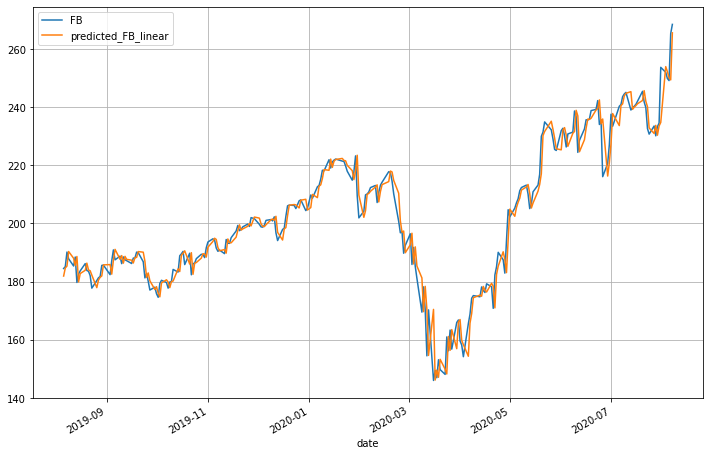

In [95]:
reg_4 = SVR(kernel = 'linear')
train_test(reg_4,data_lm, False)

In [93]:
reg_4.coef_

array([[0., 0.]])

(1025, 7076) (1025, 1)
(255, 7076) (255, 1)
Train
1024
1024
1024
1.7688022366554548 MAE
8.065692665440638 RMSE
0.01854098078567186 MLSE
0.5307317073170732 MDA
Test
3.4001582250715843 MAE
24.865968153185328 RMSE
0.026077904183245473 MSLE
0.5725490196078431 MDA
0
0


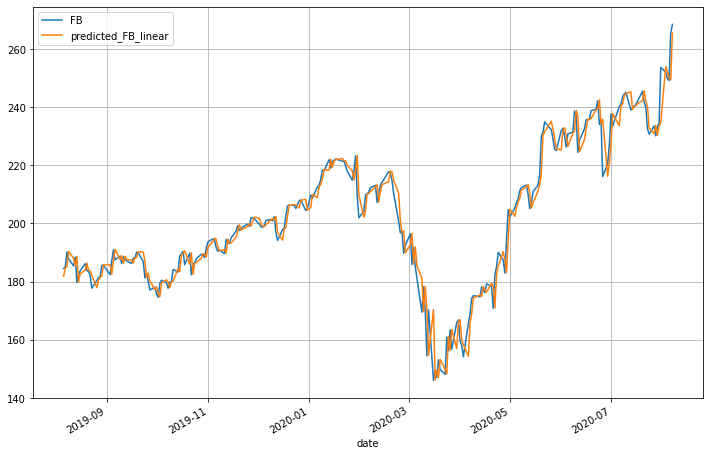

In [57]:
reg_5 = lgb.LGBMRegressor(max_depth = 10)
train_test(reg_5,data_lm, True)

In [90]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
reg_6 = LinearRegression()
reg_6.fit(train_X_sc,train_y_sc)
[x for x in list(reg_6.coef_.flatten()) if x!= 0]

[]

In [81]:
test['predict_return_linear']

date
2019-08-06    0.001089
2019-08-07    0.000905
2019-08-08    0.000919
2019-08-09    0.000922
2019-08-12    0.000947
                ...   
2020-08-03    0.000993
2020-08-04    0.001056
2020-08-05    0.001050
2020-08-06    0.001043
2020-08-07    0.001040
Name: predict_return_linear, Length: 255, dtype: float64

prediction at 0 days completed
prediction at 1 days completed
prediction at 2 days completed
prediction at 3 days completed
prediction at 4 days completed
prediction at 5 days completed
prediction at 6 days completed
prediction at 7 days completed
prediction at 8 days completed
prediction at 9 days completed
prediction at 10 days completed
prediction at 11 days completed
prediction at 12 days completed
prediction at 13 days completed
prediction at 14 days completed
prediction at 15 days completed
prediction at 16 days completed
prediction at 17 days completed
prediction at 18 days completed
prediction at 19 days completed
prediction at 20 days completed
prediction at 21 days completed
prediction at 22 days completed
prediction at 23 days completed
prediction at 24 days completed
prediction at 25 days completed
prediction at 26 days completed
prediction at 27 days completed
prediction at 28 days completed
prediction at 29 days completed
prediction at 30 days completed
prediction at 31 d

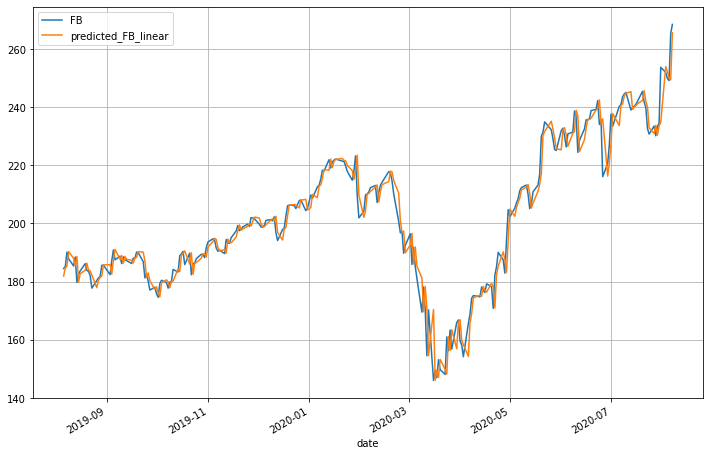

In [83]:
predictions = []
for i in range(test_X_sc.shape[0]): 

    predict = y_sc.inverse_transform(reg_6.predict(test_X_sc[i,:].reshape(1, -1))) 

    predictions.append(predict)

    temp_train_X = np.vstack((train_X_sc,test_X_sc[:i,:]))
    temp_train_y = np.vstack((train_y_sc,test_y_sc[:i,:]))

    reg_6.fit(temp_train_X,temp_train_y)
    print('prediction at ' + str(i) + ' days completed')

predictions = [ x[0][0] for x in predictions]
test['predict_return_linear'] = predictions

stock_yesterday = [i for i in list(data['FB'].loc['2019-08-05':'2020-08-06'])]
return_pred = [i for  i in list(test['predict_return_linear'])]

pred_stock = [i1 * (1+i2) for (i1,i2) in zip(stock_yesterday,return_pred)]
    
print('Test')
test['predicted_FB_linear'] = pred_stock
#test['predicted_FB_linear'] = stock_true * (1 + test['predict_return_linear']) 
print(mean_absolute_error(test['FB'], test['predicted_FB_linear']), 'MAE')
print(mean_squared_error(test['FB'], test['predicted_FB_linear']),'RMSE')
print(np.sqrt(mean_squared_log_error(abs(test['FB']), abs(test['predicted_FB_linear']))),'MSLE')
#print(mda(test['FB'].values, test['predicted_FB_linear'].values),'MDA')
print(MDA(test,'predicted_FB_linear'),'MDA')

plt.figure(figsize = (12,8))
test['FB'].plot(legend = True)
test['predicted_FB_linear'].plot(legend = True)
plt.grid()

In [84]:
test['predict_return_linear']

date
2019-08-06    0.000905
2019-08-07    0.000905
2019-08-08    0.000919
2019-08-09    0.000922
2019-08-12    0.000947
                ...   
2020-08-03    0.000993
2020-08-04    0.001056
2020-08-05    0.001050
2020-08-06    0.001043
2020-08-07    0.001040
Name: predict_return_linear, Length: 255, dtype: float64

In [89]:
[x for x in list(reg_6.coef_.flatten()) if x!= 0]

[]